Hola **Roberto**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Analyst debes cuidar la presentación de tus notebooks, siempre procura dejar un título general y una breve introducción al proyecto al inicio de tu notebook.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Listo se agregó un título e introducción inicial <a class=“tocSkip”></a>
</div>

# Proyecto para la toma de decisiones de negocio basadas en datos

## Proyecto para analizar los resultados de lanzar un test A/B para una tienda online

In [1]:
# Cargamos las librearias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

In [2]:
# Cargamos los datos de hipótesis y observamos su estructura
df_hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
print(df_hypo)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecha la exploración inicial de tus datos, siempre es importante revisar la calidad de los mismos para garantizar un análisis correcto
</div>

## Parte 1
### Priorizar hipótesis

In [3]:
# Aplicar el framework ICE y ordenarlo en orden descendente
df_hypo['ICE'] = (df_hypo['Impact'] * df_hypo['Confidence']) / df_hypo['Effort']
print(df_hypo[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Podemos observar que las hipotesis con ICE más alto son 8, 0, 7, 6, 2 y convergen entre 16 a 7 puntos, posteriormente los valores bajan drásticamente.

In [4]:
# Aplicar el framework RICE y ordenarlo en orden descendente
df_hypo['RICE'] = (df_hypo['Reach'] * df_hypo['Impact'] * df_hypo['Confidence']) / df_hypo['Effort']
print(df_hypo[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Podemos observar que las hipotesis con RICE más alto son 7, 2, 0, 6, 8 y convergen entre 112 a 16 puntos, cabe mencionar que son las mismas 5 hipótesis con puntuación ICE más alto.

In [30]:
# Mostrar cambio de en priorización 
df_hypo['Cambio'] = df_hypo['ICE'] - df_hypo['RICE']
print(df_hypo.head(5))
print(df_hypo[['Hypothesis', 'Cambio']].sort_values(by='Cambio'))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE  RICE     Cambio  
0           8       6  13.333333  40.0 -26.666667  
1           4      10   2.000000   4.0  -2.000000  
2           7       3   7.000000  56.0 -49.000000  
3           3       8   1.125000   9.0  -7.875000  
4           1       1   1.000000   3.0  -2.000000  
                                          Hypothesis      Cambio
7  Add a subscription form to all the main pages.... -100.800000
2  Add product recommendation blocks to the store...  -49.000000
6  Show banners with current offers and sales on ...  -32.000000
0

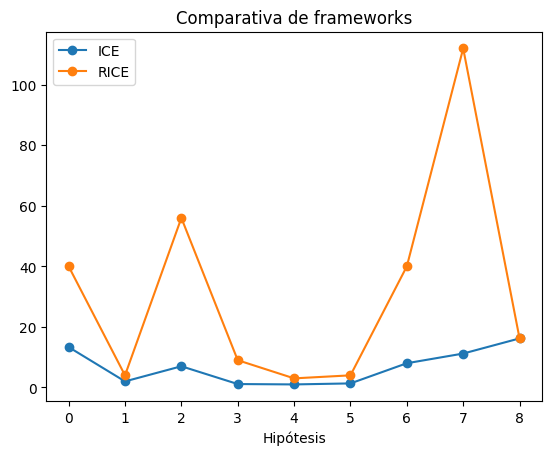

In [36]:
plt.plot(df_hypo['ICE'], label='ICE', marker='o')
plt.plot(df_hypo['RICE'], label='RICE', marker='o')
plt.title('Comparativa de frameworks')
plt.xlabel('Hipótesis')
plt.legend()
plt.show()

Comentarios acerca de los cambios:

Al observar solo los valores de ICE y RICE, queda claro que el alcance (Reach) puede multiplicar o limitar el valor de una idea. Muchas acciones que parecían medianamente útiles bajo ICE se vuelven altamente valiosas bajo RICE. Esto resalta la importancia de considerar cuántos usuarios realmente se beneficiarán antes de priorizar esfuerzos.

El ejemplo más notorio es el cambio en la hipótesis 7 cuando consideramos un factor como el alcance (Reach).

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! También podrías presentar en gráfica este tipo de comparaciones ya que es es muy bueno para que sea mucho más entendible la comparación
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Listo se agregó un gráfico para visualizar los datos <a class=“tocSkip”></a>
</div>

## Parte 2
### Análisis del test A/B

In [6]:
# Cargamos los archivos pedidos
df_orders = pd.read_csv('/datasets/orders_us.csv')
df_orders.info()
print(df_orders)
print(df_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14     50.

In [7]:
# Cargamos los archivos visitas
df_visits = pd.read_csv('/datasets/visits_us.csv')
df_visits.info()
print(df_visits)
print(df_visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
          date group  visits
0   2019-08-01     A     719
1   2019-08-02     A     619
2   2019-08-03     A     507
3   2019-08-04     A     717
4   2019-08-05     A     756
..         ...   ...     ...
57  2019-08-27     B     720
58  2019-08-28     B     654
59  2019-08-29     B     531
60  2019-08-30     B     490
61  2019-08-31     B     718

[62 rows x 3 columns]
0


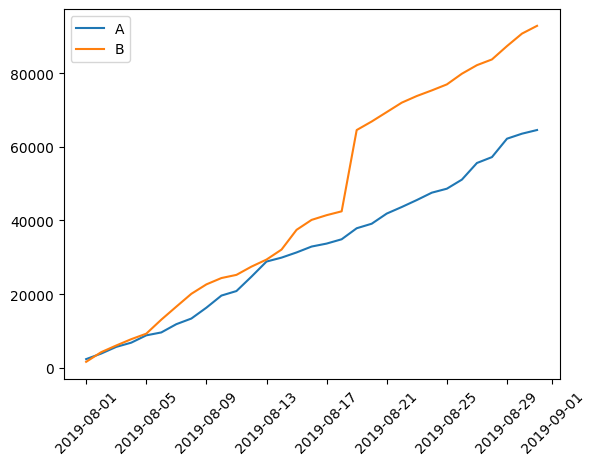

In [27]:
# 1. Representa gráficamente el ingreso acumulado por grupo. 
# Haz conclusiones y conjeturas.
# Vamos a recopilar los datos acumulados

# Convertimos las columnas de date a formato datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visits['date'] = pd.to_datetime(df_visits['date'])
 
# Creamos una matriz con valores únicos de parejas fecha-grupo
datesGroups = df_orders[['date', 'group']].drop_duplicates()

# Recopilamos los datos diarios acumulados agregados sobre los pedidos
ordersAggregated = datesGroups.apply(lambda x: df_orders
    [np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 
    'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# Hacemos lo mismo con los datos diarios acumulados de las visitas
visitorsAggregated = datesGroups.apply(lambda x: df_visits
    [np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# Fusionamos las dos tablas en una y damos nombres a las columnas
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Creamos gráfico de ingresos acumulados por día y por grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# Creamos gráfico de ingresos acumulados por día y por grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# Trazamos el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.legend()

Los ingresos aumentan constantenmente durante la prueba, sin embargo, podemos observar como los ingresos del grupo B en cierto momento incrementan considerablemente más que el grupo A. Esto pudiera deberse a un incremento de pedidos o talvez pedidos más caros en la muestra.

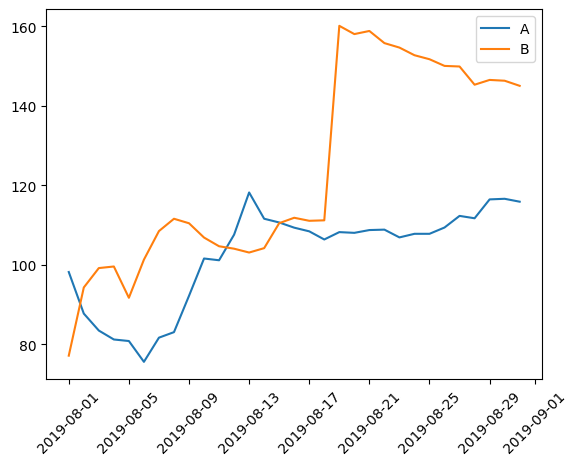

In [24]:
# 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. 
# Haz conclusiones y conjeturas.

# Trazamos el tamaño promedio de compra por grupo 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend()


El grupo B tiene un tamaño de compra promedio claramente superior, aún cuando ambos grupo tuvieron inicios muy volátiles. El cambio abrupto en el crecimiento de B puede deberse a cambios en el comportamiento de las compras o transacciones con valores atípicos.

Es probable que el grupo B haya sido expuesto a alguna variante de incentivos que hiciera más atractivo el realizar pedidos, además la estabilización que observamos hacia el final de experimento sugiere que esto pudiera mantenerse con el tiempo.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia entre cada grupo. Pero el eje X tiene las fechas una sobre otra lo cual no es correcto, por lo que te pediría aplicar una rotación a eje X para que cada fecha se pueda visualizar correctamente
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Listo se agregó el parámetro para mejor visualización <a class=“tocSkip”></a>
</div>

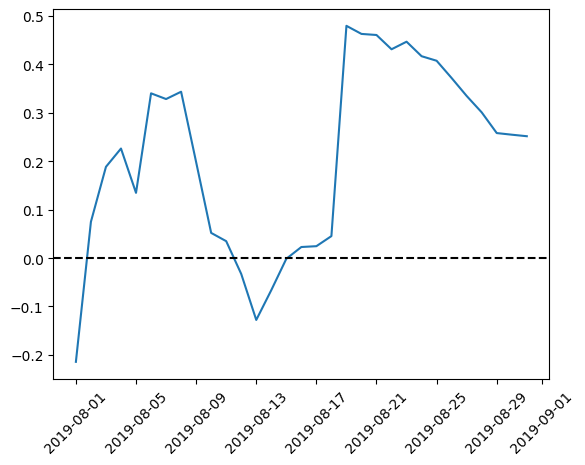

In [25]:
# 3. Representa gráficamente la diferencia relativa en el tamaño de pedido 
# promedio acumulado para el grupo B en comparación con el grupo A. 
# Haz conclusiones y conjeturas.

# Trazaremos un gráfico de diferencia relativa para los tamaños promedio
# Reunimos los datos en un solo Dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Trazamos gráfico de diferencia relativa
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)

# Agregamos el eje x
plt.axhline(y=0, color='black', linestyle='--')


Podemos observar que el grupo B tiene un tamaño de compra promedio mayor al de A durante la mayor parte del experimento, el comportamiento al inicio es inestable pero tiene a estabilizarse con el tiempo.

El punto más alto del gráfico representa que existió una diferenca de casi .5 con el grupo A, esto nos dice que el grupo B estaba comprando un 50% más en promedio.

El cambio o factor en relación al grupo B puede ser el causante de incentivar las compras o tener compras más grandes, la caída que observamos al final puede representar que cierto factor o promoción ya fué aprovechada y las compras están disminuyendo.

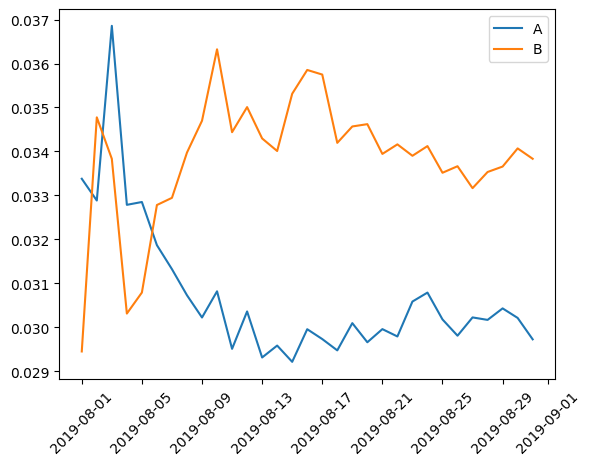

In [26]:
# 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número
# de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los 
# dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

# Calculamos la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Seleccionamos datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# Seleccionamos datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Trazamos el gráfico
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()


El grupo B mantiene una tasa de conversión superior de forma consistente, aún cuando ambos grupos tiene un inicio muy errático su surva se estabiliza por encima de la del grupo A.

Las tasas de conversión de ambos grupos ronda entre el 2.9% y el 3.7%, aun cuando no son valores muy altos este incremento puede ser significativa en términos de ingresos.

El grupo B posiblemente optimizó su flujo de compra o implementó alguna mejora, el cambio sugiere que no solo fue efectivo sino que además logró ser estable y sostenible con el tiempo.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Igual aquí deberías arreglas las gráficas para que el eje X no se muestre de esa forma, pero el cálculo es correcto!<!--  -->
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Listo se agregó el parámetro para mejor visualización <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Siempre procura dejar visualizaciones claras para que sea fácil exponer tus resultados
</div>

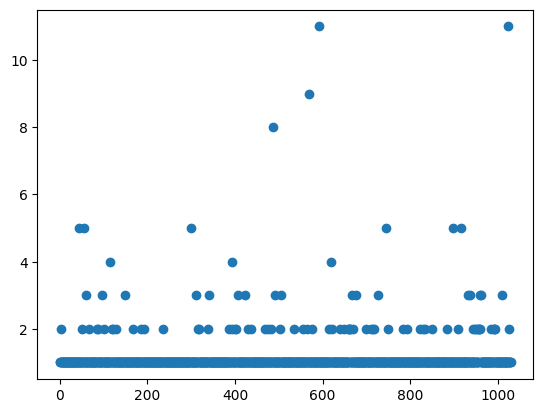

In [12]:
# 5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

# Buscamos el número de pedidos por usuario
ordersByUsers = (
    df_orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
)
# Cambiamos los nombres a las columnas
ordersByUsers.columns = ['userId', 'orders']

# Trazamos el gráfico de dispersión con el número de pedidos por usuario
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

Podemos observar que muchos de los usuarios han realizado un solo pedido, sin embargo, una parte significativa hizo de dos a cuatro. 

In [13]:
# 6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual 
# un punto de datos se convierte en una anomalía.

print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


No más del 5% de los usuarios realizaron más de 2 pedidos y el 1% no realizaron más de 4. Por lo tanto sería razonlable fijar un umbral de 2 pedidos por usuario como límite superior para un comportamiento normal y utilizarlo para filtar cualquier anomalía.

425     19920.4
1196     3120.1
858      1450.2
1136     1425.8
744      1335.6
         ...   
390         5.2
414         5.2
602         5.1
404         5.1
1003        5.0
Name: revenue, Length: 1197, dtype: float64


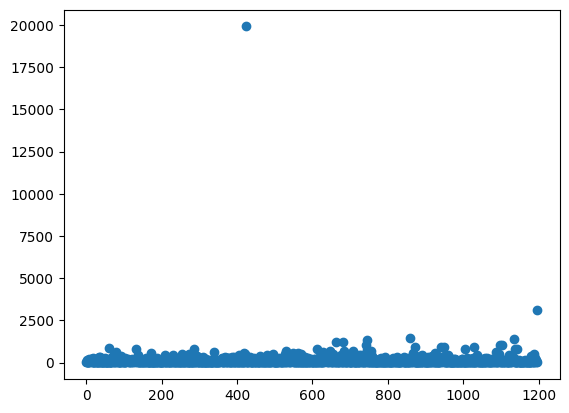

In [14]:
# 7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
# Trazamos el gráfico de dispersión de los precios de los pedidos

x_values = pd.Series(range(0, len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])
print(df_orders['revenue'].sort_values(ascending=False))

Se puede observar que existen algunos pedidos grandes de acuerdo al grafico, podemos establecer el límite para pedidos anormales entre 1250 y 2000.

In [15]:
# 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. 
# Define el punto en el cual un punto de datos se convierte en una anomalía.

print(np.percentile(df_orders['revenue'], [95, 99]))

[435.54  900.904]


No más del 5% de los pedidos cuestan más de 435.54 y no más del 1% cuestan más de 900.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores atípicos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

In [44]:
# 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 
# Haz conclusiones y conjeturas.

# Calculamos las variables ordersByUsersA y orderByUsersB para almacenar las columnas necesarias
ordersByUsersA = df_orders[df_orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_orders[df_orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

# Declaramos 2 variables con usuarios de diferentes grupos y número de pedidos. Los que no tienen pedidos tendrán 0.
# Las variables contendrán 2 cosas, una lista del número de pedidos de cada usuario y ceros para los usuarios que no pidieron nada
# Las secuencias las concatenaremos con pd.concat(), también pasamos el argumento axis=1 que especifica el concatenado será por fila
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

# Para obtener la tasa de conversión dividiremos la suma de los pedidos entre la cantidad de usuarios
# Usaremos también el método mean() para encontrar la media
valor_p = ('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
imp = ('{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
print('valor p:', valor_p)       
print('importancia estadística:', imp)

valor p: 0.017
importancia estadística: 0.138


Como conclusión podemos decir que debido a que el primer dato es 0.017 rechazamos la hipótesis nula de que no existen diferencias entre los grupos A y B según los datos sin procesar.

Además también podemos observar que el grupo B realizó en promedio un 13.8% más pedidos que el grupo A.

In [45]:
# 10. Encuentra la significancia estadística de la diferencia en el tamaño promedio 
# de pedido entre los grupos utilizando los datos en bruto. 
# Haz conclusiones y conjeturas.

valor_p = ('{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group'] == 'A']['revenue'], df_orders[df_orders['group'] == 'B']['revenue'])[1]))
imp = ('{0:.3f}'.format(df_orders[df_orders['group'] == 'B']['revenue'].mean()/df_orders[df_orders['group'] == 'A']['revenue'].mean()-1))
print('valor p:', valor_p)       
print('importancia estadística:', imp)

valor p: 0.692
importancia estadística: 0.252


Podemos observar que el valor p es notablemente superior a 0.05 por lo que no podemos rechazar la hipótesis nula y concluir que el tamaño promedio de los pedidos difiere entre los grupos.

También observamos que el tamaño de los pedidos del grupo B es más grande que los del grupo A.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para aprovechar mejor los strings formateados y que los resultados que estás mostrando sean más claro te recomendaría incluir un texto o palabra que describa el valor que mostrado
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Listo se agregaron comentarios junto a los datos <a class=“tocSkip”></a>
</div>

In [18]:
# 11. Encuentra la significancia estadística de la diferencia en la conversión 
# entre los grupos utilizando los datos filtrados. 
# Haz conclusiones y conjeturas.

# Vamos a definir que los usuarios anómalos son aquellos que realizan más de 2 pedidos o pedidos mayor a $500
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)
print('Encontramos 61 usuarios anómalos')

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(61,)
Encontramos 61 usuarios anómalos


In [46]:
# Calculamos la significancia estadísitca de las diferencias entre los grupos filtrados
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

# Aplicamos el criterio estadístico de Mann-Whitney a las muestras resultantes
valor_p = ('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
imp = ('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
print('valor p:', valor_p)       
print('importancia estadística:', imp)

valor p: 0.007
importancia estadística: 0.190


Como conclusión podemos decir que debido a que el primer dato es 0.007 rechazamos la hipótesis nula de que no existen diferencias entre los grupos A y B según los datos sin procesar. Cabe mencionar que es el mismo resultado obtenido con los datos brutos 

Además también podemos observar que el grupo B realizó en promedio un 19% más pedidos que el grupo A. Este valor se vió incrementado en 6 puntos con los datos filtrados.

In [53]:
# 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido 
# entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

# Mostramos el valor p calculado con la prueba U de Mann Whitney
valor_p = ('{0:.3f}'.format(stats.mannwhitneyu(df_orders[np.logical_and(df_orders['group'] == 'A',
np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
df_orders[np.logical_and(df_orders['group'] == 'B', np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

# Mostramos la diferencia relativa en el ingreso medio entre los grupos A y B
imp = ('{0:.3f}'.format(df_orders[np.logical_and(df_orders['group'] == 'B',
np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / df_orders[np.logical_and
(df_orders['group'] == 'A', np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))    
print('valor p:', valor_p)
print('importancia estadística:', imp)

valor p: 0.910
importancia estadística: 0.011


Podemos observar que el valor p es notablemente superior a 0.05 por lo que no podemos rechazar la hipótesis nula y concluir que el tamaño promedio de los pedidos difiere entre los grupos.

También observamos que el tamaño de los pedidos del grupo B supera al grupo A pero solo por 1%.

## 13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Decisión Final: Parar la prueba, considerar al grupo B como líder.

Justificación:

1. El grupo B presenta un impacto consistente en la métrica de pedidos por visitante. Demuestra una mejora del 13.8% al 19%, aún cuando se eliminar los outliers el resultado se mantiene o incluso mejora.

2. Muy probablemente continuar la prueba no cambiará los resultados. No se ven señales de que el revenue por pedido vaya a volverse significativo ni que esté empeorando con el grupo B.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con estos últimos cambios! Ahora el proyecto es mucho más claro y se nota un mejor manejo de las gráficas y código en general.
</div>